In [3]:
import pandas as pd

In [4]:
df = pd.read_excel("C://Users//computer//Downloads//Lung Capacity (1).xlsx")

In [5]:
df


,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Risk
0,6.475,6,62.1,no,male,0
1,10.125,18,74.7,yes,female,0
2,9.550,16,69.7,no,female,1
3,11.125,14,71.0,no,male,0
4,4.800,5,56.9,no,male,0
...,...,...,...,...,...,...
720,5.725,9,56.0,no,female,0
721,9.050,18,72.0,yes,male,1
722,3.850,11,60.5,yes,female,0
723,9.825,15,64.9,no,female,0


In [6]:
df.size

4350

In [7]:
df.shape


(725, 6)

In [8]:
df.dtypes


LungCap(cc)       float64
Age( years)         int64
Height(inches)    float64
Smoke              object
Gender             object
Risk                int64
dtype: object

In [9]:
df.isnull()

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Risk
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
720,False,False,False,False,False,False
721,False,False,False,False,False,False
722,False,False,False,False,False,False
723,False,False,False,False,False,False


In [10]:
df.notnull().sum()

LungCap(cc)       725
Age( years)       725
Height(inches)    725
Smoke             725
Gender            725
Risk              725
dtype: int64

In [11]:
import matplotlib.pyplot as plt1
import seaborn as sns

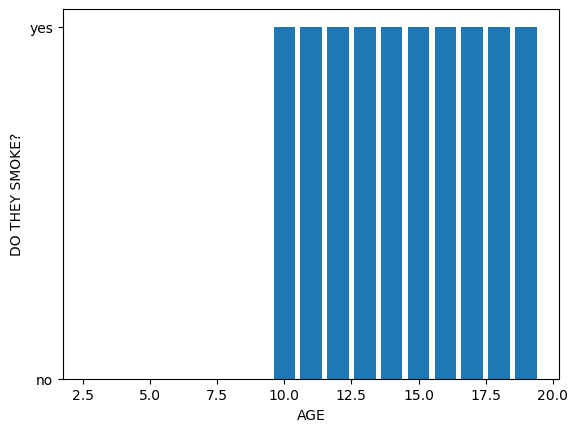

In [12]:
x = df['Age( years)']
y = df['Smoke']
plt1.xlabel("AGE")
plt1.ylabel("DO THEY SMOKE?")
plt1.bar(x,y)
plt1.show()

In [13]:
df.corr(method='pearson')

C:\Users\computer\AppData\Local\Temp\ipykernel_7348\1928163937.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,LungCap(cc),Age( years),Height(inches),Risk
LungCap(cc),1.000000,0.819675,0.912187,0.021317
Age( years),0.819675,1.000000,0.835737,0.056339
Height(inches),0.912187,0.835737,1.000000,0.060397
Risk,0.021317,0.056339,0.060397,1.000000


C:\Users\computer\AppData\Local\Temp\ipykernel_7348\2680202822.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method="pearson"), annot=True)


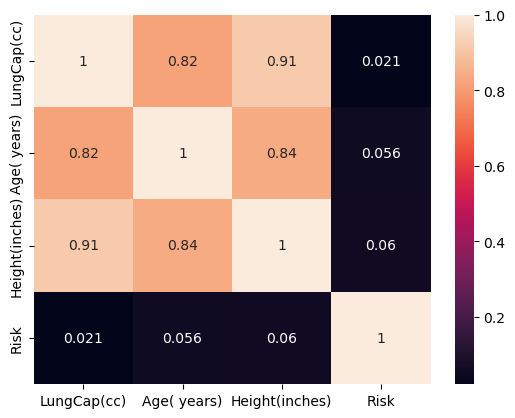

In [15]:
sns.heatmap(df.corr(method="pearson"), annot=True)
plt1.show()
plt1.clf()
plt1.close()

In [16]:
from scipy import stats

In [18]:
df['zscore'] = stats.zscore(df['LungCap(cc)'])
df.sort_values(by='zscore')
df[['LungCap(cc)', 'zscore']]

,LungCap(cc),zscore
0,6.475,-0.521826
1,10.125,0.850266
2,9.550,0.634114
3,11.125,1.226181
4,4.800,-1.151485
...,...,...
720,5.725,-0.803763
721,9.050,0.446156
722,3.850,-1.508605
723,9.825,0.737491


In [19]:
df['zscore'].max()

2.5606814373484754

In [20]:
df['zscore'].min()

-2.7652904716863573

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Smoke'] = le.fit_transform(df['Smoke'])
df['Gender'] = le.fit_transform(df['Gender'])
df.head(10)

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Risk,zscore
0,6.475,6,62.1,0,1,0,-0.521826
1,10.125,18,74.7,1,0,0,0.850266
2,9.550,16,69.7,0,0,1,0.634114
3,11.125,14,71.0,0,1,0,1.226181
4,4.800,5,56.9,0,1,0,-1.151485
5,6.225,11,58.7,0,0,0,-0.615805
6,4.950,8,63.3,0,1,1,-1.095098
7,7.325,11,70.4,0,1,0,-0.202298
8,8.875,15,70.5,0,1,0,0.380371
9,6.800,11,59.2,0,1,0,-0.399654


In [31]:
df_dummy = df

In [33]:
X = df_dummy.drop(columns=['Risk'])
Y = df_dummy[['Risk']]

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [37]:
len(x_train),len(x_test),len(y_train),len(y_test)


(543, 182, 543, 182)

In [38]:
from sklearn.naive_bayes import GaussianNB
naive=GaussianNB()
naive_model=naive.fit(x_train,y_train)
naive_model
print("model ran successfully")

model ran successfully


C:\Users\computer\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
y_test

,Risk
326,0
518,0
554,0
33,1
375,1
...,...
264,1
394,0
367,1
204,0


In [40]:
y_test['Predicted']=naive_model.predict(x_test)

In [41]:
y_test

,Risk,Predicted
326,0,0
518,0,0
554,0,0
33,1,0
375,1,0
...,...,...
264,1,0
394,0,0
367,1,0
204,0,0


In [43]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import numpy as np

In [46]:
accuracy=accuracy_score(y_test['Risk'],y_test['Predicted'])
accuracy=np.round(accuracy,2)
print("Accuracy: ",accuracy)

Accuracy:  0.75


In [47]:
print(classification_report(y_test['Risk'],y_test['Predicted']))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86       137
           1       0.00      0.00      0.00        45

    accuracy                           0.75       182
   macro avg       0.38      0.50      0.43       182
weighted avg       0.57      0.75      0.65       182



C:\Users\computer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\computer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\computer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
